<a href="https://colab.research.google.com/github/goeckslab/MarkerIntensityPredictor/blob/dev/KNN_Phenotype_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook the check the cell neighbor phenotypes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
phenotypes = pd.read_csv("mapped_phenotypes.csv")

# shift column Base cell to first position in df 
first_column = phenotypes.pop('Base Cell')
phenotypes.insert(0, 'Base Cell', first_column)
phenotypes


,Base Cell,1,2,3,4,5,6
0,Basal,Basal,Basal,Basal,Basal,Basal,Basal
1,Basal,Basal,Basal,Basal,Basal,Basal,Basal
2,Basal,Basal,Basal,Basal,Basal,Basal,Basal
3,Basal,Basal,Basal,Basal,Basal,Basal,Basal
4,Basal,Basal,Basal,Basal,Basal,Basal,Basal
...,...,...,...,...,...,...,...
27522,Basal,Basal,Basal,Basal,Basal,Basal,Basal
27523,Basal,Basal,Basal,Basal,Basal,Basal,Basal
27524,Basal,Basal,Basal,Basal,Basal,Basal,Basal
27525,Basal,Basal,Basal,Basal,Basal,Immune,Basal


In [4]:
# Load nearest neighbor indices

In [5]:
no_spatial_ni = pd.read_csv('no_spatial_nearest_neighbor_indices.csv')
no_spatial_ni = no_spatial_ni.T
no_spatial_ni.rename(columns={0:"Base Cell"}, inplace=True)
print(no_spatial_ni)


       Base Cell      1      2      3      4      5      6
0              0  17014   5849  26672   6841  25626  26608
1              1   5858     14  26258     46    756  25065
2              2      5     18   5665  13168  26324  12767
3              3   5993     10   1925    655   2601  13184
4              4     10   2601   5993     11   5894   6083
...          ...    ...    ...    ...    ...    ...    ...
27522      27522  26724  26919  26718  27504  26968  27075
27523      27523  26777  26901  27524  26732  26721  26775
27524      27524  27508  26901  26712  27523  27021  27477
27525      27525  27524  27039  17440  10958   5111  26699
27526      27526  26581  26570  26526  24908  26640  27469

[27527 rows x 7 columns]


In [6]:
spatial_ni = pd.read_csv('spatial_nearest_neighbor_indices.csv')
spatial_ni = spatial_ni.T
spatial_ni.rename(columns={0:"Base Cell"}, inplace=True)
print(spatial_ni)


       Base Cell      1      2      3      4      5      6
0              0     51     47    941     23      9      7
1              1     47     50    941   1614   3444     34
2              2      9     25     12      3   1284      4
3              3     10     55     56     37      4     85
4              4     17     22     10      8     60     55
...          ...    ...    ...    ...    ...    ...    ...
27522      27522  27492  27028  26922  26889  27094  27430
27523      27523  26968  27096  26732  27205  26944  27079
27524      27524  27021  27455  27120  26762  27094  27075
27525      27525  27492  23067  27120  26839  26619  27381
27526      27526  26581  26640  26526  26608  26673  26563

[27527 rows x 7 columns]


In [7]:
data = pd.read_csv("HTA9-2_Bx1_HMS_Tumor_quant.csv")
data["Phenotype"] = phenotypes["Base Cell"]
data.head()

,CellID,DAPI_1_cellMasks,AF488_cellMasks,AF555_cellMasks,AF647_cellMasks,DAPI_2_cellMasks,ERK1_1_cellMasks,ERK1_2_cellMasks,RAD51_cellMasks,DAPI_3_cellMasks,...,p21_nucleiMasks,DAPI_7_nucleiMasks,CK14_nucleiMasks,AR_nucleiMasks,cPARP_nucleiMasks,DAPI_8_nucleiMasks,CK17_nucleiMasks,CK7_nucleiMasks,HER2_nucleiMasks,Phenotype
0,1,18399.201646,1938.308642,951.753086,1536.115226,6840.255144,1285.267490,883.053498,1218.925926,14302.860082,...,514.773663,94.288066,2164.238683,379.246914,2489.053498,198.650206,2298.633745,141.518519,2568.308642,Basal
1,2,13872.480000,1933.280000,895.360000,1496.160000,6647.280000,1241.400000,864.480000,1408.320000,14804.480000,...,523.680000,95.720000,2175.960000,381.560000,2500.080000,192.200000,2289.400000,141.720000,2591.960000,Basal
2,3,10940.505263,11353.252632,788.294737,4166.000000,119.452632,898.242105,379.168421,823.926316,143.189474,...,532.494737,151.168421,2197.578947,385.263158,2720.484211,198.568421,2344.273684,146.221053,2580.915789,Basal
3,4,10590.968254,8699.428571,714.428571,2570.920635,117.904762,926.841270,395.603175,832.333333,130.253968,...,530.190476,143.365079,2167.571429,389.269841,2527.301587,191.000000,2328.047619,141.492063,2569.523810,Basal
4,5,16300.946429,8819.517857,916.303571,2854.267857,74.678571,884.607143,391.196429,792.589286,72.625000,...,515.517857,76.339286,2162.750000,387.678571,2485.535714,183.214286,2314.357143,140.392857,2573.964286,Basal


## Display phenotypes in biopsy

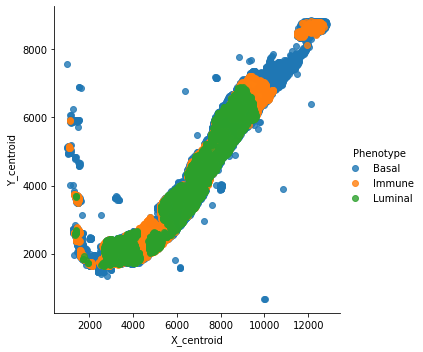

In [8]:
sns.lmplot(x='X_centroid', y='Y_centroid', data=data, hue='Phenotype', fit_reg=False)

# Specify cell index to select all neighbors and investigate the neighbor hood

## Select no spatial neighbors

In [9]:
cell_index_to_evaluate = 2500

n_sp_neighbor_indices = no_spatial_ni[no_spatial_ni["Base Cell"] == cell_index_to_evaluate]
n_sp_phenotype_indices = phenotypes.loc[[cell_index_to_evaluate]]

print(n_sp_phenotype_indices)
print(n_sp_neighbor_indices)

     Base Cell      1      2      3      4      5      6
2500     Basal  Basal  Basal  Basal  Basal  Basal  Basal
      Base Cell      1      2      3    4      5      6
2500       2500  25592  24669  17397  623  26483  26652


In [10]:
n_sp_cells = data.loc[n_sp_neighbor_indices.values[0].tolist()][["X_centroid", "Y_centroid"]]
n_sp_cells["Phenotype"] = phenotypes["Base Cell"]
n_sp_origin = pd.DataFrame(n_sp_cells.loc[[cell_index_to_evaluate]])
print(n_sp_origin)

n_sp_neighbors = n_sp_cells[1:]
print(n_sp_neighbors)

      X_centroid  Y_centroid Phenotype
2500  1422.28125  2060.03125     Basal
         X_centroid   Y_centroid Phenotype
25592   7789.328571  7165.657143     Basal
24669  10296.209302  6864.383721     Basal
17397   7318.205128  5294.243590     Basal
623     2090.184211  1779.684211     Basal
26483  10621.814286  7574.342857     Basal
26652  11436.269841  7862.658730     Basal


Show nearest neighbor for given cell

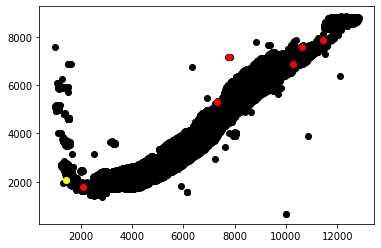

In [11]:
plt.scatter(data["X_centroid"] ,data["Y_centroid"], facecolors='black')
plt.scatter(n_sp_cells["X_centroid"], n_sp_cells["Y_centroid"] , color="red")
plt.scatter(n_sp_origin["X_centroid"], n_sp_origin["Y_centroid"] , color="yellow")


## Select spatial neighbors

In [12]:
sp_neighbor_indices = spatial_ni[spatial_ni["Base Cell"] == cell_index_to_evaluate]
sp_phenotype_indices = phenotypes.loc[[cell_index_to_evaluate]]

print(sp_phenotype_indices)
print(sp_neighbor_indices)

     Base Cell      1      2      3      4      5      6
2500     Basal  Basal  Basal  Basal  Basal  Basal  Basal
      Base Cell     1     2     3     4    5     6
2500       2500  6680  1048  2168  6112  925  3425


In [13]:
sp_cells = data.loc[sp_neighbor_indices.values[0].tolist()][["X_centroid", "Y_centroid"]]
sp_cells["Phenotype"] = phenotypes["Base Cell"]
sp_cells
sp_origin = pd.DataFrame(sp_cells.loc[[cell_index_to_evaluate]])
print(sp_origin)

sp_neighbors = sp_cells[1:]
print(sp_neighbors)

      X_centroid  Y_centroid Phenotype
2500  1422.28125  2060.03125     Basal
       X_centroid   Y_centroid Phenotype
6680  1495.307692  2622.307692    Immune
1048  1677.031746  1839.000000     Basal
2168  1506.207254  2014.709845     Basal
6112  1368.017241  2528.310345    Immune
925   2068.175676  1823.283784     Basal
3425  1702.172414  2184.057471     Basal


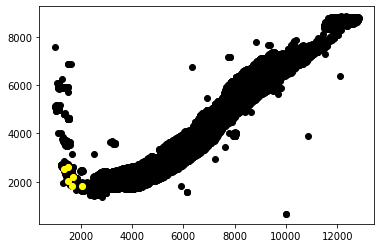

In [14]:
plt.scatter(data["X_centroid"] ,data["Y_centroid"], facecolors='black')
plt.scatter(sp_neighbors["X_centroid"], sp_neighbors["Y_centroid"] , color="red")
plt.scatter(sp_neighbors["X_centroid"], sp_neighbors["Y_centroid"] , color="yellow")

# Compare spatial and non spatial neighbors


Plot shows where the neighbors are located for the given cell, when including spatial information and without spatial information

Text(0.5, 1.0, 'Origin and Neighbors not including Spatial Information')

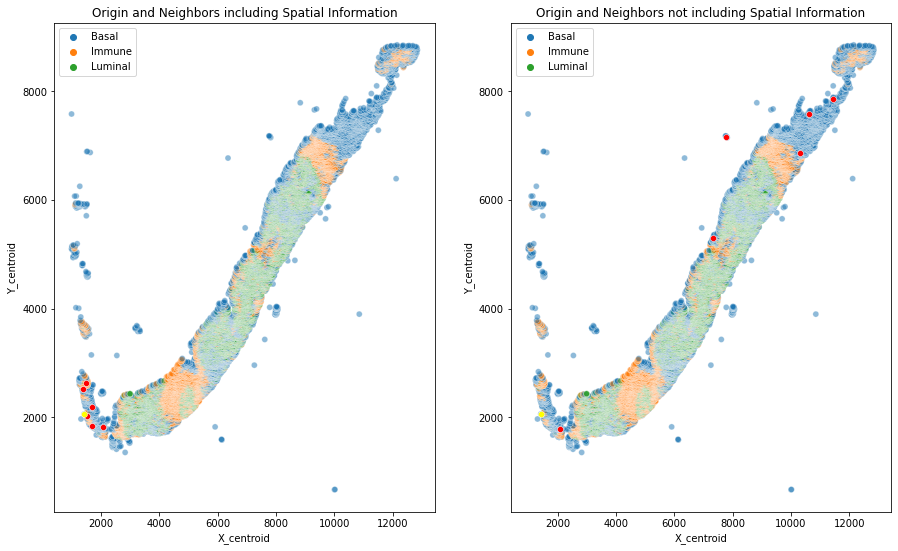

In [15]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,9))

sns.scatterplot(x='X_centroid', y='Y_centroid', data=data, hue='Phenotype',  ax=ax1, alpha=0.5)
sns.scatterplot(x='X_centroid', y='Y_centroid', data=sp_neighbors, ax=ax1, color="red")
sns.scatterplot(x='X_centroid', y='Y_centroid', data=sp_origin, ax=ax1, color="yellow")
ax1.set_title("Origin and Neighbors including Spatial Information")


sns.scatterplot(x='X_centroid', y='Y_centroid', data=data, hue='Phenotype',  ax=ax2, alpha=0.5)
sns.scatterplot(x='X_centroid', y='Y_centroid', data=n_sp_neighbors, ax=ax2, color="red")
sns.scatterplot(x='X_centroid', y='Y_centroid', data=n_sp_origin, ax=ax2, color="yellow")
ax2.set_title("Origin and Neighbors not including Spatial Information")

#R2 Significance


Based on this thread
https://www.researchgate.net/post/Comparing_R-squared_values_in_two_models_any_help

and and answer by Ghassan Okour, 
R2 significance is calculated like the following:





```
Firstly; calculate the root square of both squared R.
Secondly; transform the values of the root square of both squared R into Fisher values.
Thirdly; use the formula Z=[z1-z2]/sqrt[(1/(n1-3))+(1/(n2-3))].
Fourthly; use the formula Sig. =(1-NORM.S.DIST(ABS(Z),TRUE))*2.
```



In [35]:
# z function

def calculate_z(input1, input2):
  print(input1)
  print(input2)


In [44]:
no_spatial_r2_scores_2 = pd.read_csv("no_spatial_imputed_r2_score_2.csv")
no_spatial_r2_scores_3 = pd.read_csv("no_spatial_imputed_r2_score_3.csv")

no_spatial_r2_scores_2.rename(columns={"Score": "2 Neighbor Score"}, inplace=True)
no_spatial_r2_scores_3.rename(columns={"Score": "3 Neighbor Score"}, inplace=True)

markers = no_spatial_r2_scores_2["Marker"]

combined = pd.concat([no_spatial_r2_scores_2, no_spatial_r2_scores_3], axis=1)
combined.drop(columns=["Marker"], inplace=True)
combined["Marker"] = markers

# Set negative values to 0
num = combined._get_numeric_data()
num[num < 0] = 0

combined['2 Neighbor Squareroot']=combined['2 Neighbor Score']**(1/2)
combined['3 Neighbor Squareroot']=combined['3 Neighbor Score']**(1/2)


combined["2 Neighbor Z"] = combined["2 Neighbor Squareroot"].apply(lambda x : 0.5* (np.log(1 + x) - np.log(1-x)))
combined["3 Neighbor Z"] = combined["3 Neighbor Squareroot"].apply(lambda x : 0.5* (np.log(1 + x) - np.log(1-x)))
combined["Z"] = (combined["2 Neighbor Z"] - combined["3 Neighbor Z"]) / np.sqrt(1 / (combined["2 Neighbor Z"].shape[0]-3) + (1/(combined["3 Neighbor Z"].shape[0]-3)))
combined["Significane"] = (1 - np.random.normal(np.absolute(combined["Z"]))) * 2
print(combined)

    2 Neighbor Score  3 Neighbor Score           Marker  \
0           0.269694          0.332596           ERK1_1   
1           0.288658          0.348264            RAD51   
2           0.308183          0.361913           Cyc_D1   
3           0.432649          0.495100         Vimentin   
4           0.000000          0.041440             aSMA   
5           0.681881          0.722318       E_cadherin   
6           0.617167          0.645310         ER_alpha   
7           0.000000          0.033588               PR   
8           0.766650          0.792990             EGFR   
9           0.418117          0.479443               Rb   
10          0.108768          0.176229             CD45   
11          0.430622          0.469710             Ki67   
12          0.548815          0.571569             CK19   
13          0.124650          0.215316              p21   
14          0.774728          0.800448             CK14   
15          0.796665          0.812668               AR 